In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Nivedita\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Nivedita\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = "C:\\Users\\Nivedita\\Downloads\\ECOMM DATA.xlsx"
df = pd.read_excel(file_path)

In [3]:
print("A DATASET")
print(df.info())

Basic Information About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      5

In [4]:
print(df.describe())

            Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2013-05-11 21:26:49.155781120   
min        1.00000            2011-01-01 00:00:00   
25%    12823.25000            2012-06-19 00:00:00   
50%    25645.50000            2013-07-08 00:00:00   
75%    38467.75000            2014-05-22 00:00:00   
max    51290.00000            2014-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date   Postal Code         Sales  \
count                          51290   9994.000000  51290.000000   
mean   2013-05-15 20:42:42.745174528  55190.379428    246.490581   
min              2011-01-03 00:00:00   1040.000000      0.444000   
25%              2012-06-23 00:00:00  23223.000000     30.758625   
50%              2013-07-12 00:00:00  56430.500000     85.053000   
75%              2014-05-26 00:00:00  90008.000000    251.053200   
max              2015-01-07 00:00:00  99301.00

In [5]:
# Check for missing values
print(df.isnull().sum())


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [6]:
# Calculate total sales
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $12,642,501.91


In [8]:

# Convert 'Order Date' to datetime format if not already
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

Total Sales: $12,642,501.91


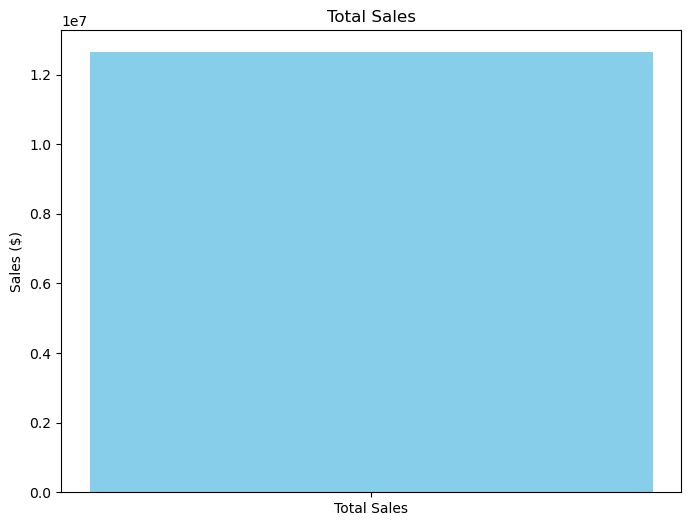

In [9]:
# 1. Total Sales
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

plt.figure(figsize=(8, 6))
plt.bar(['Total Sales'], [total_sales], color='skyblue')
plt.title('Total Sales')
plt.ylabel('Sales ($)')
plt.show()

In [13]:
# Set the index to 'Order Date' for resampling
df.set_index('Order Date', inplace=True)

# Sales Trends Over Time - Monthly sales
# Make sure to exclude any non-numeric columns from the sum operation
monthly_sales = df[['Sales']].resample('M').sum()

# Best-Selling Products
top_products_revenue = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
top_products_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

# Best-Selling Customers
top_customers_revenue = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
top_customers_quantity = df.groupby('Customer Name')['Quantity'].sum().sort_values(ascending=False)
     

C:\Users\Nivedita\AppData\Local\Temp\ipykernel_432\2651999438.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df[['Sales']].resample('M').sum()


<Figure size 1000x600 with 0 Axes>

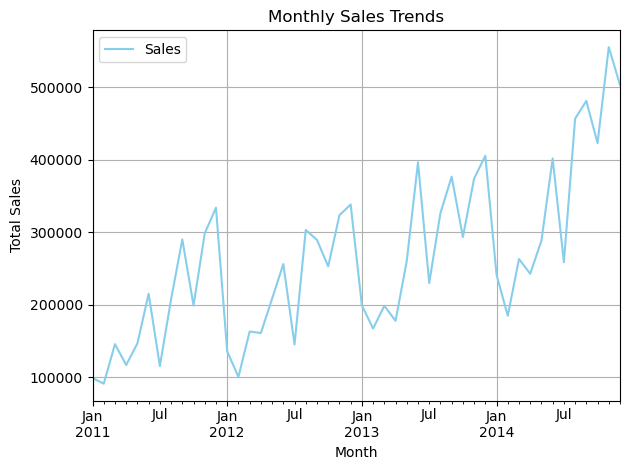

In [16]:
# Plotting Monthly Sales Trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', title='Monthly Sales Trends', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout() 
plt.show()
     

                                           Product Name       Sales
310                        Apple Smart Phone, Full Size  86935.7786
970                        Cisco Smart Phone, Full Size  76441.5306
2415                    Motorola Smart Phone, Full Size  73156.3030
2501                       Nokia Smart Phone, Full Size  71904.5555
866               Canon imageCLASS 2200 Advanced Copier  61599.8240
1837         Hon Executive Leather Armchair, Adjustable  58193.4841
2631  Office Star Executive Leather Armchair, Adjust...  50661.6840
1714  Harbour Creations Executive Leather Armchair, ...  50121.5160
2988                      Samsung Smart Phone, Cordless  48653.4600
2502                  Nokia Smart Phone, with Caller ID  47877.7857


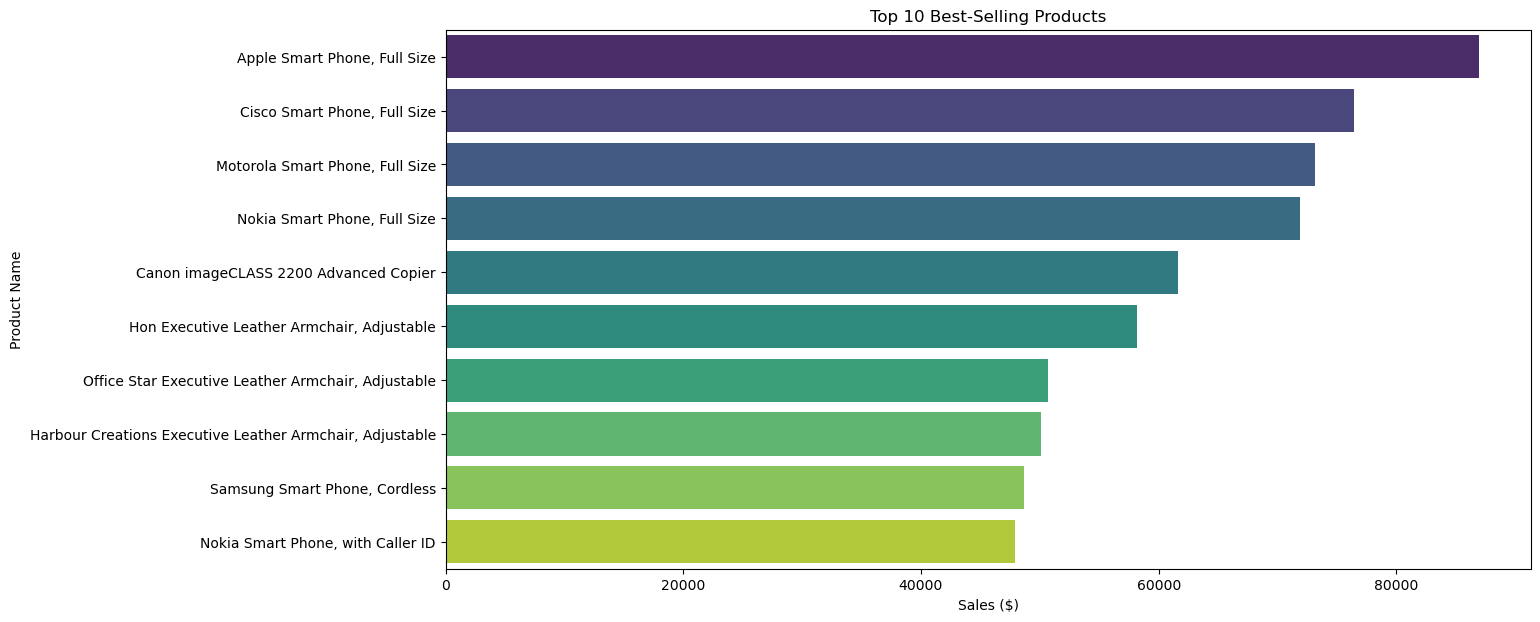

In [17]:
# 3. Best-Selling Products
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
top_10_products = product_sales.head(10)
print(top_10_products)

plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_products, x='Sales', y='Product Name', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Sales ($)')
plt.ylabel('Product Name')
plt.show()


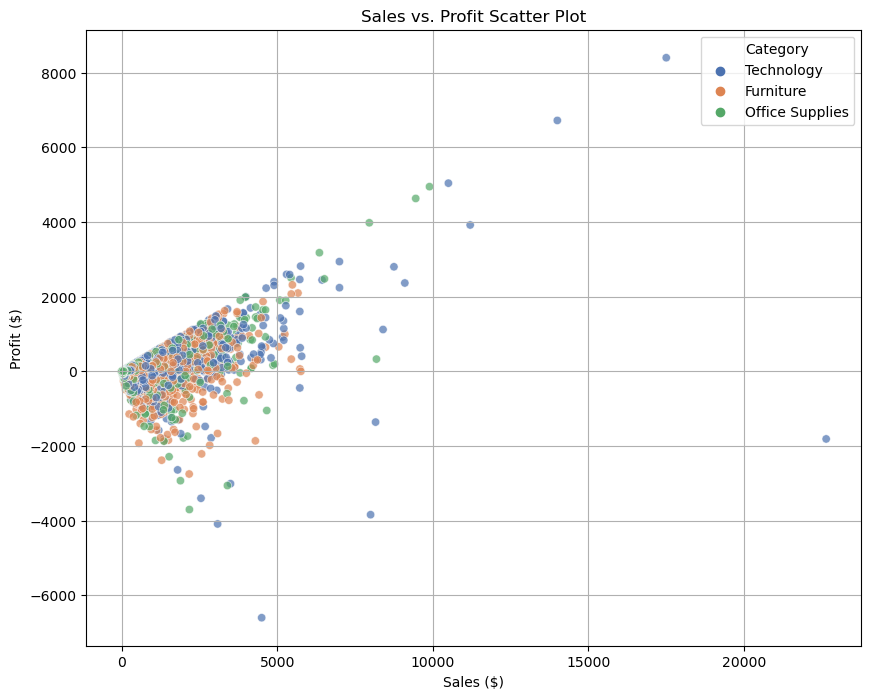

In [18]:
# 4. Sales vs. Profit Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', palette='deep', alpha=0.7)
plt.title('Sales vs. Profit Scatter Plot')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.legend(title='Category')
plt.grid(True)
plt.show()

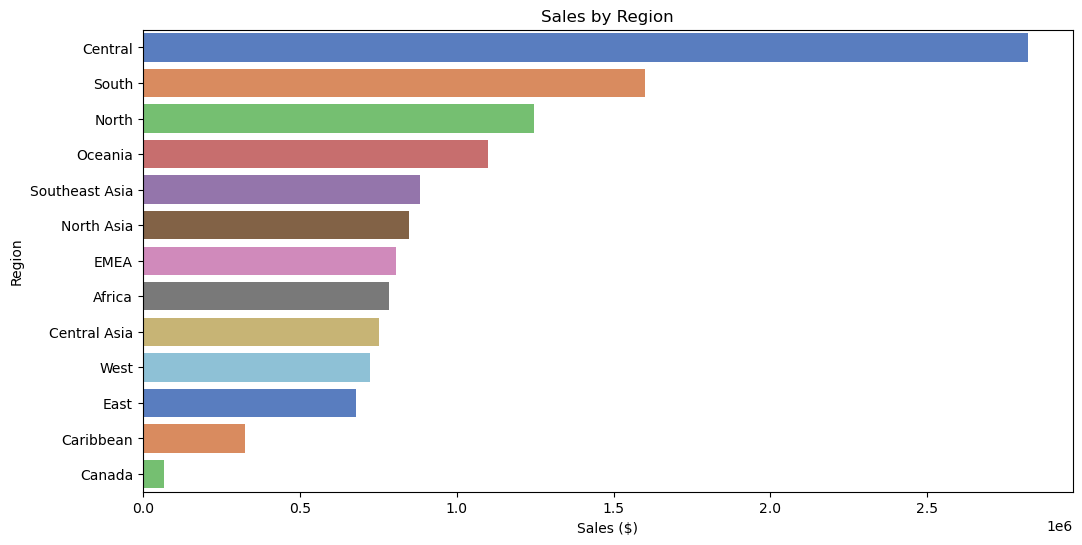

In [19]:
# 5. Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='Sales', y='Region', palette='muted')
plt.title('Sales by Region')
plt.xlabel('Sales ($)')
plt.ylabel('Region')
plt.show()

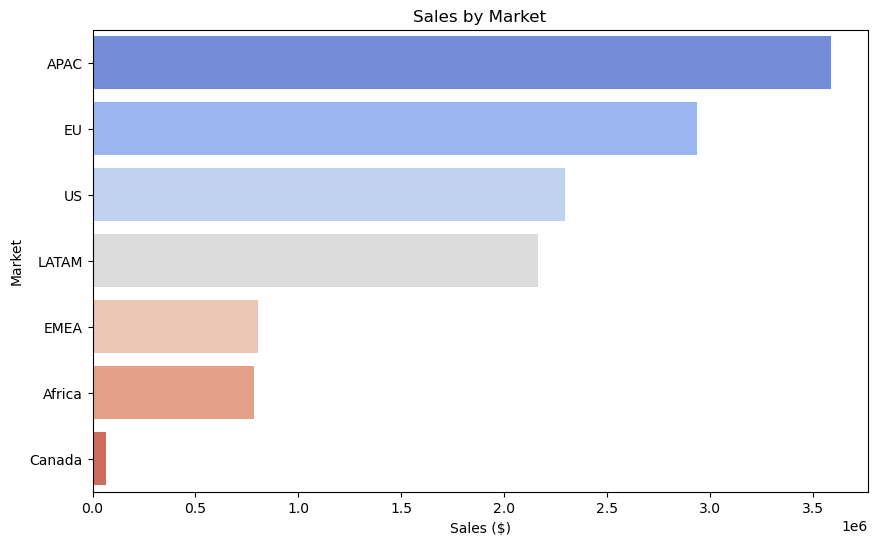

In [20]:
# 6. Sales by Market
market_sales = df.groupby('Market')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=market_sales, x='Sales', y='Market', palette='coolwarm')
plt.title('Sales by Market')
plt.xlabel('Sales ($)')
plt.ylabel('Market')
plt.show()

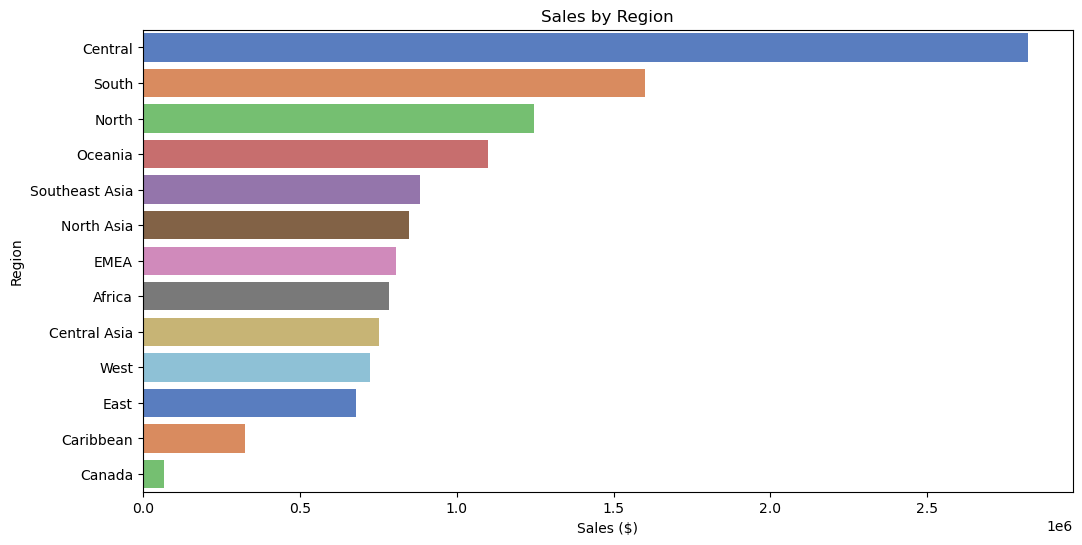

In [22]:
# 7. Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='Sales', y='Region', palette='muted')
plt.title('Sales by Region')
plt.xlabel('Sales ($)')
plt.ylabel('Region')
plt.show()

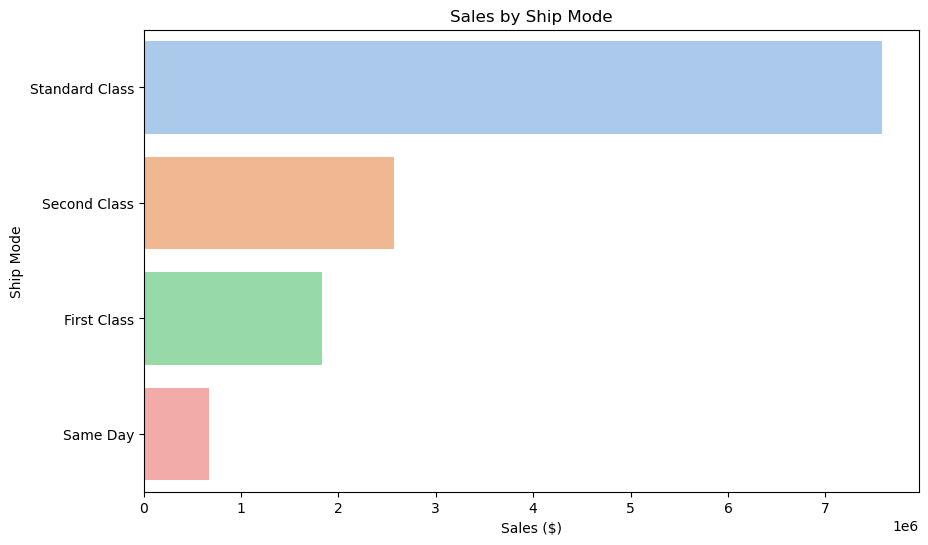

In [28]:
#8. Sales by Ship Mode
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=ship_mode_sales, x='Sales', y='Ship Mode', palette='pastel')
plt.title('Sales by Ship Mode')
plt.xlabel('Sales ($)')
plt.ylabel('Ship Mode')
plt.show()


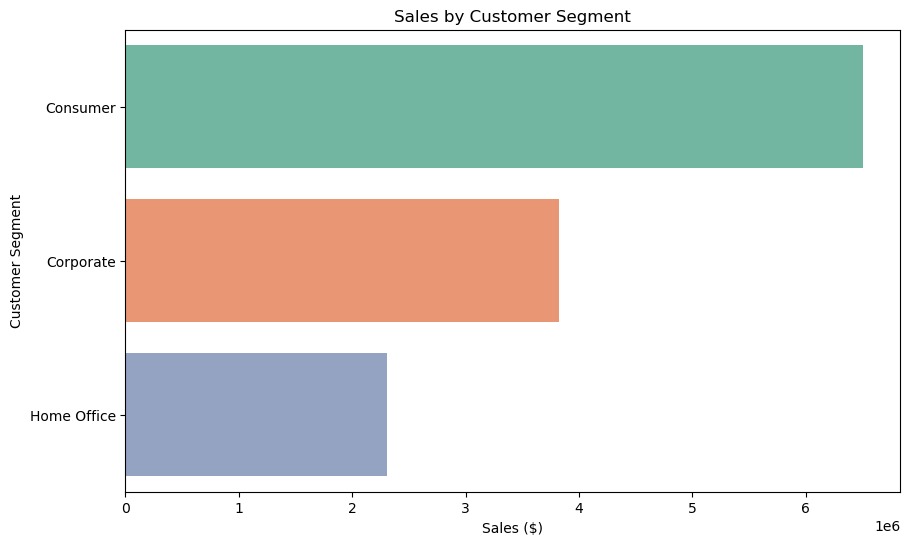

In [24]:
#9 Sales by Customer Segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_sales, x='Sales', y='Segment', palette='Set2')
plt.title('Sales by Customer Segment')
plt.xlabel('Sales ($)')
plt.ylabel('Customer Segment')
plt.show()


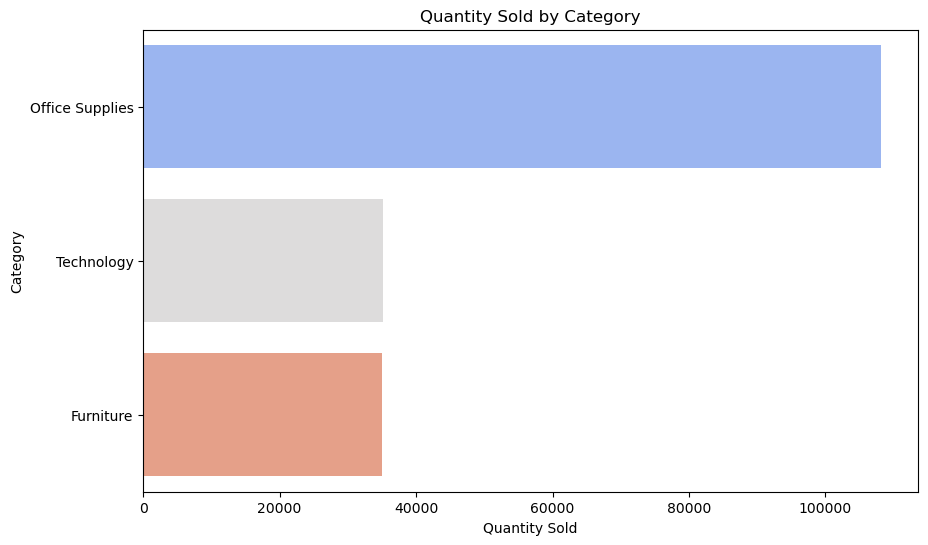

In [25]:
#10 Quantity Sold by Category
category_quantity = df.groupby('Category')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=category_quantity, x='Quantity', y='Category', palette='coolwarm')
plt.title('Quantity Sold by Category')
plt.xlabel('Quantity Sold')
plt.ylabel('Category')
plt.show()


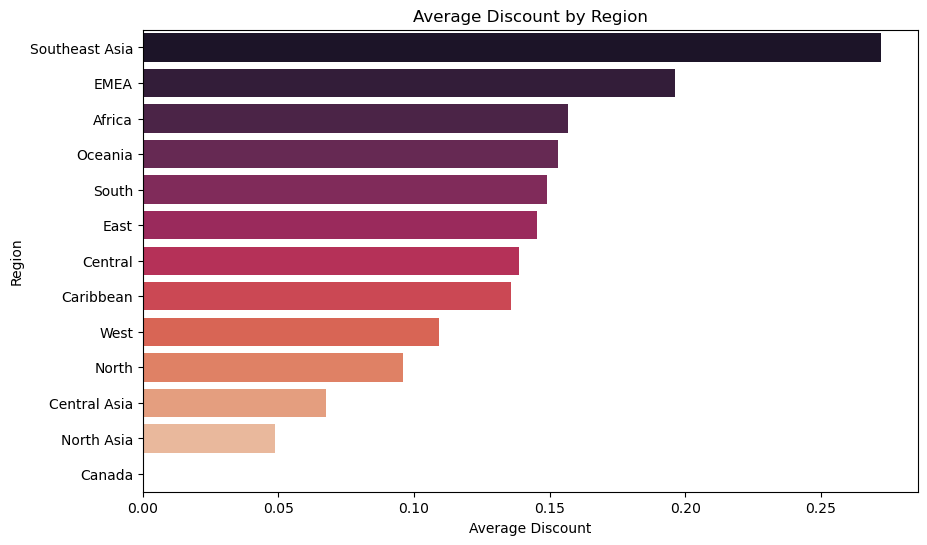

In [26]:
#11 Average Discount by Region
region_discount = df.groupby('Region')['Discount'].mean().reset_index().sort_values(by='Discount', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_discount, x='Discount', y='Region', palette='rocket')
plt.title('Average Discount by Region')
plt.xlabel('Average Discount')
plt.ylabel('Region')
plt.show()


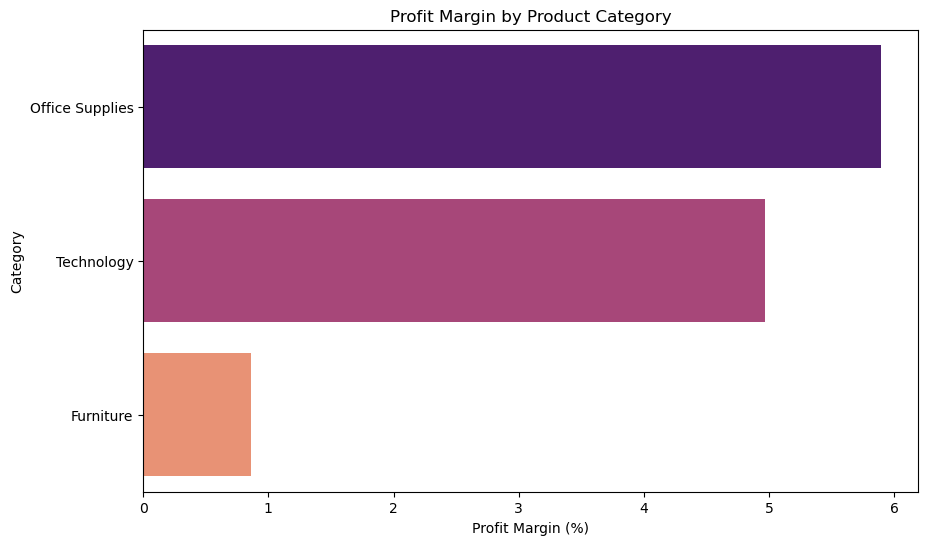

In [27]:
#12 Profit Margin by Product Category
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
category_profit_margin = df.groupby('Category')['Profit Margin'].mean().reset_index().sort_values(by='Profit Margin', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=category_profit_margin, x='Profit Margin', y='Category', palette='magma')
plt.title('Profit Margin by Product Category')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Category')
plt.show()
